In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [6]:
df=pd.read_csv('autos.csv',encoding='ISO-8859-1')


In [7]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [8]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [9]:
df.shape

(371528, 20)

## Cleaning the dataset

In [10]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
# Droping the Unwanted Columns
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)

In [12]:
df.drop(columns= ['dateCrawled', 'dateCreated', 'name','lastSeen'], inplace = True)

## Missing Values

In [13]:
#check missing values
df.isnull().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
dtype: int64

In [14]:
#replacing the missing values
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [15]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,70435
1,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,66954
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,90480
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


In [16]:
df.tail()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
371523,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,39576
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,26135
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,87439
371526,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein,40764
371527,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,73326


In [17]:
df.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

## Remove the duplicates values

In [18]:
# Checking for Duplicates
df.duplicated().sum()

16293

In [19]:
# Removing Duplicates
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

## label Encoding

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355235 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                355235 non-null  int64 
 1   abtest               355235 non-null  object
 2   vehicleType          355235 non-null  object
 3   yearOfRegistration   355235 non-null  int64 
 4   gearbox              355235 non-null  object
 5   powerPS              355235 non-null  int64 
 6   model                355235 non-null  object
 7   kilometer            355235 non-null  int64 
 8   monthOfRegistration  355235 non-null  int64 
 9   fuelType             355235 non-null  object
 10  brand                355235 non-null  object
 11  notRepairedDamage    355235 non-null  object
 12  postalCode           355235 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 37.9+ MB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355235 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   price                355235 non-null  int64
 1   abtest               355235 non-null  int32
 2   vehicleType          355235 non-null  int32
 3   yearOfRegistration   355235 non-null  int64
 4   gearbox              355235 non-null  int32
 5   powerPS              355235 non-null  int64
 6   model                355235 non-null  int32
 7   kilometer            355235 non-null  int64
 8   monthOfRegistration  355235 non-null  int64
 9   fuelType             355235 non-null  int32
 10  brand                355235 non-null  int32
 11  notRepairedDamage    355235 non-null  int64
 12  postalCode           355235 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 29.8 MB


In [24]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,1,6,1993,1,0,118,150000,0,1,38,0,70435
1,18300,1,3,2011,1,190,118,125000,5,3,1,1,66954
2,9800,1,7,2004,0,163,119,125000,8,3,14,0,90480
3,1500,1,4,2001,1,75,118,150000,6,1,38,0,91074
4,3600,1,4,2008,1,69,103,90000,7,3,31,0,60437


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'abtest'}>,
        <AxesSubplot: title={'center': 'vehicleType'}>,
        <AxesSubplot: title={'center': 'yearOfRegistration'}>],
       [<AxesSubplot: title={'center': 'gearbox'}>,
        <AxesSubplot: title={'center': 'powerPS'}>,
        <AxesSubplot: title={'center': 'model'}>,
        <AxesSubplot: title={'center': 'kilometer'}>],
       [<AxesSubplot: title={'center': 'monthOfRegistration'}>,
        <AxesSubplot: title={'center': 'fuelType'}>,
        <AxesSubplot: title={'center': 'brand'}>,
        <AxesSubplot: title={'center': 'notRepairedDamage'}>],
       [<AxesSubplot: title={'center': 'postalCode'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

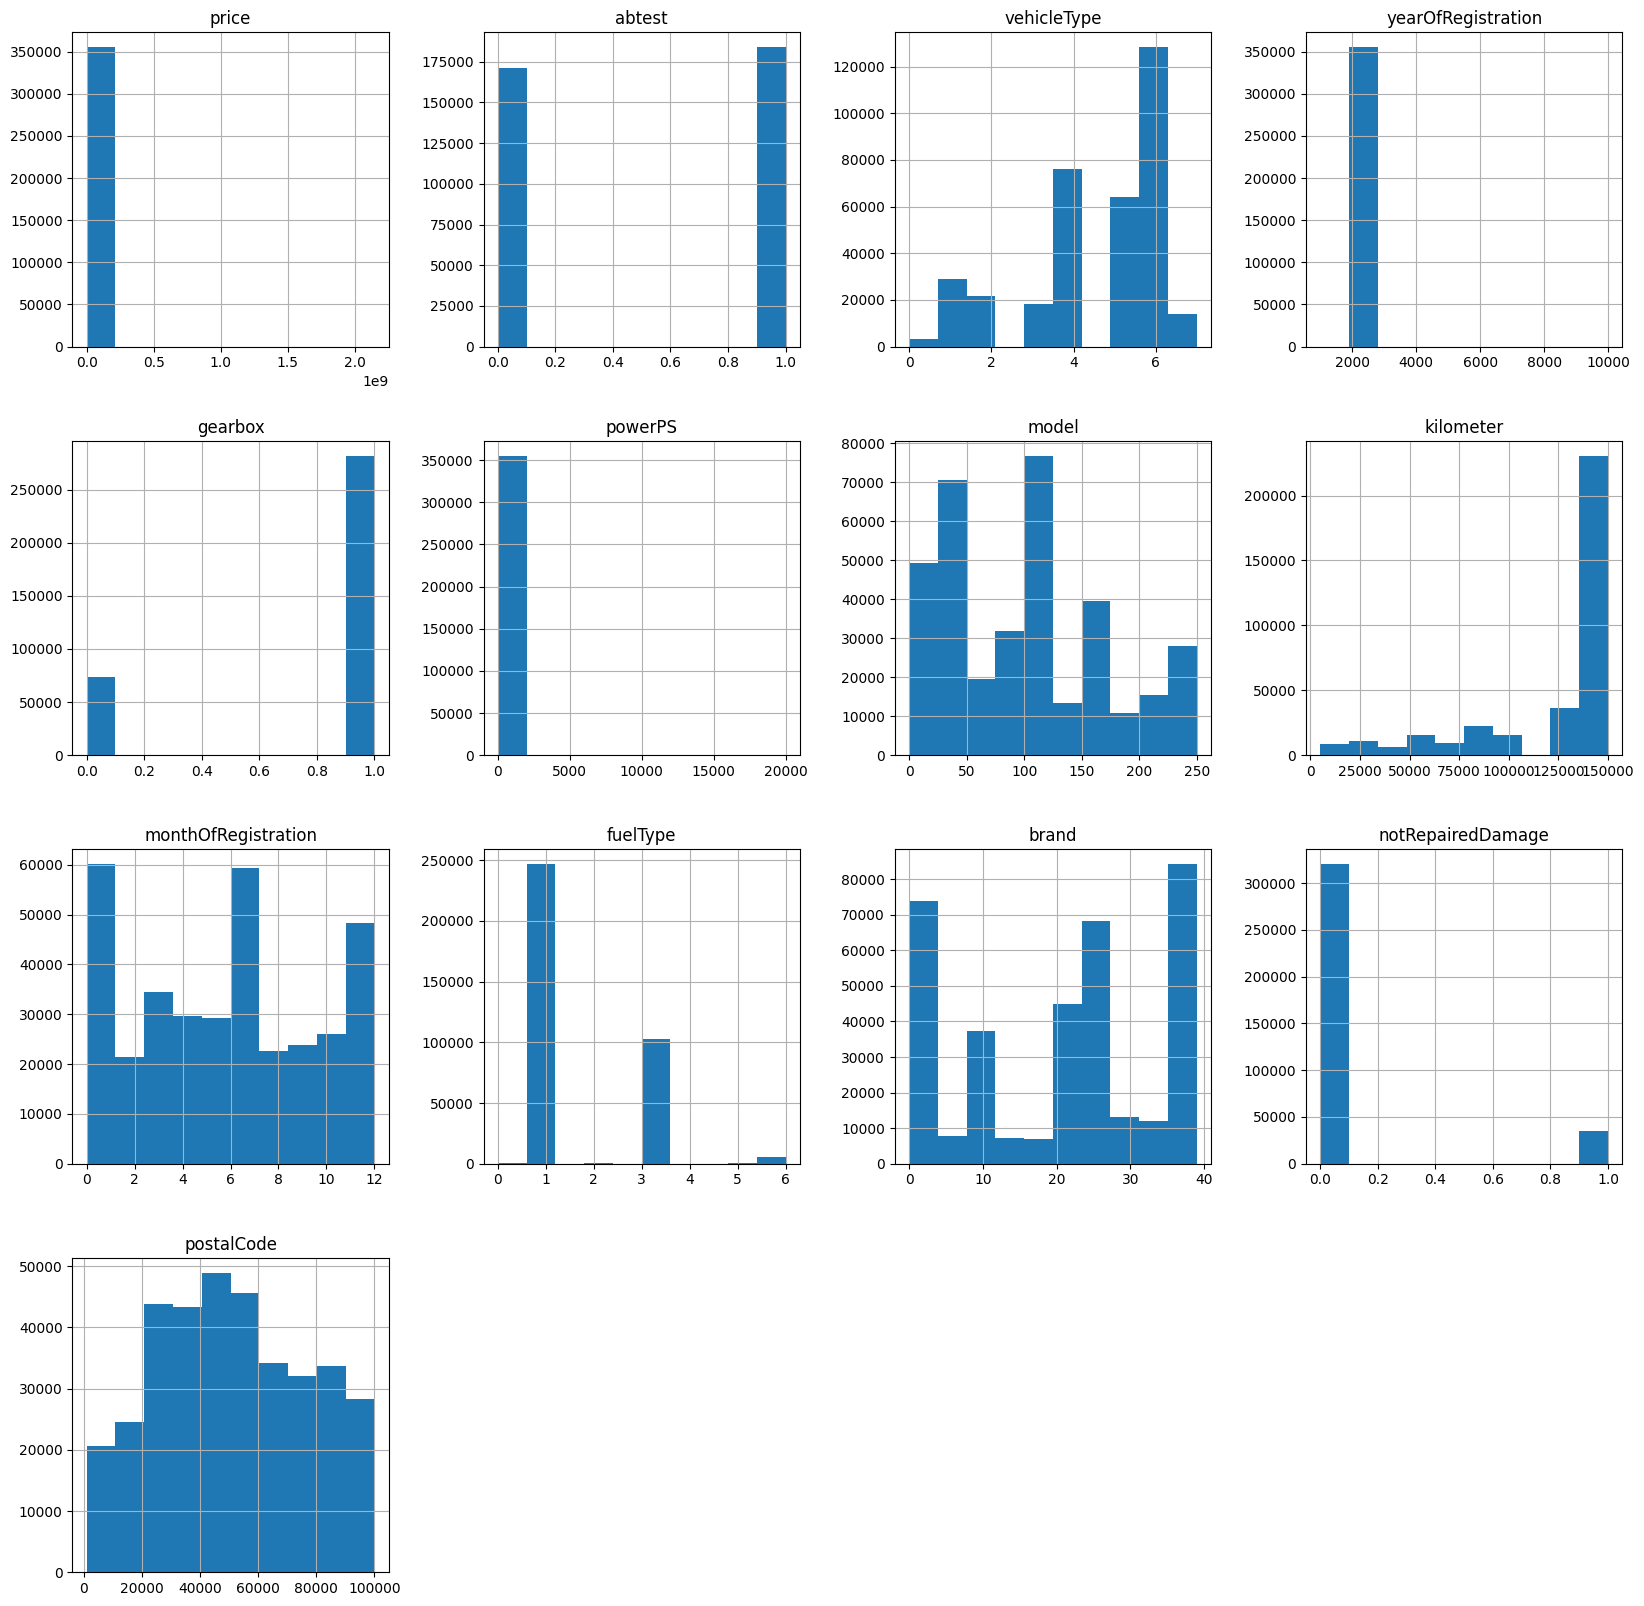

In [25]:
df.hist(figsize=(20,20))

<AxesSubplot: >

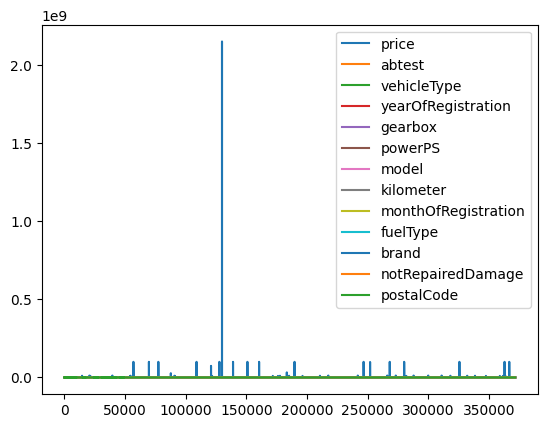

In [26]:
df.plot()

<AxesSubplot: xlabel='vehicleType'>

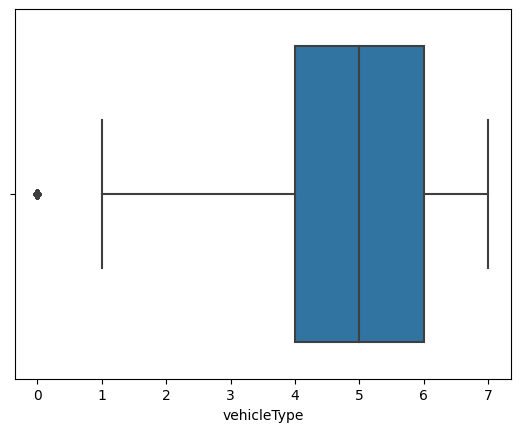

In [27]:
sns.boxplot(x = df['vehicleType'])

In [28]:
q1=df["vehicleType"].quantile(0.25)  
q3=df["vehicleType"].quantile(0.75)
q1


4.0

In [29]:
q3

6.0

In [30]:
IQR=q3-q1

In [31]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [32]:
upper_limit

9.0

In [33]:
lower_limit

1.0

In [34]:
df.median()

price                    2911.0
abtest                      1.0
vehicleType                 5.0
yearOfRegistration       2003.0
gearbox                     1.0
powerPS                   105.0
model                     104.0
kilometer              150000.0
monthOfRegistration         6.0
fuelType                    1.0
brand                      23.0
notRepairedDamage           0.0
postalCode              49688.0
dtype: float64

In [35]:
df["vehicleType"]= np.where(df["vehicleType"]<lower_limit,5.0,df["vehicleType"])

<AxesSubplot: >

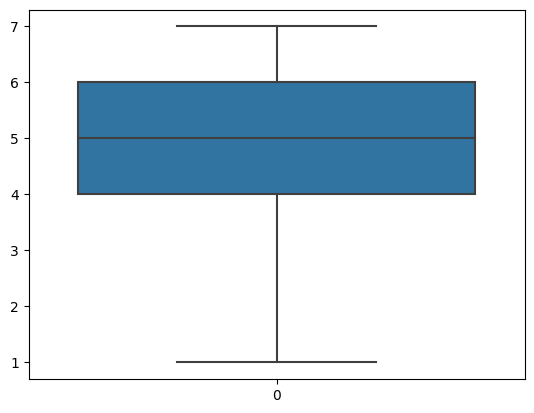

In [36]:
sns.boxplot(df["vehicleType"])

<AxesSubplot: >

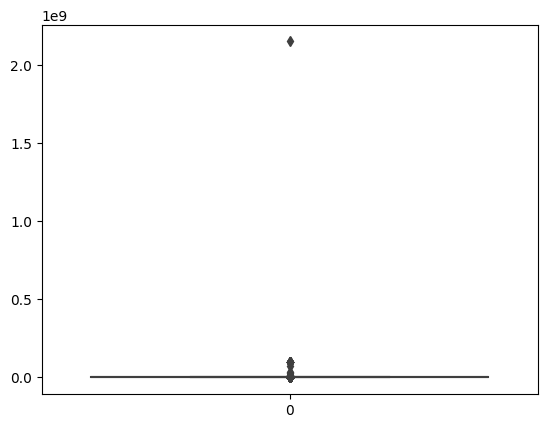

In [37]:
sns.boxplot(df['price'])

In [38]:
q1=df["price"].quantile(0.25)  
q3=df["price"].quantile(0.75)
q1

1100.0

In [39]:
q3

7100.0

In [40]:
IQR=q3-q1

In [41]:
upper_limit


9.0

In [42]:
lower_limit

1.0

In [43]:
df["price"]= np.where(df["price"]>upper_limit,16150.0,df["price"])

<AxesSubplot: >

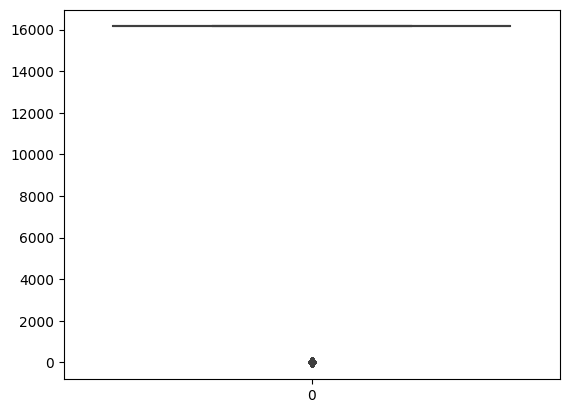

In [44]:
sns.boxplot(df['price'])

<AxesSubplot: xlabel='yearOfRegistration'>

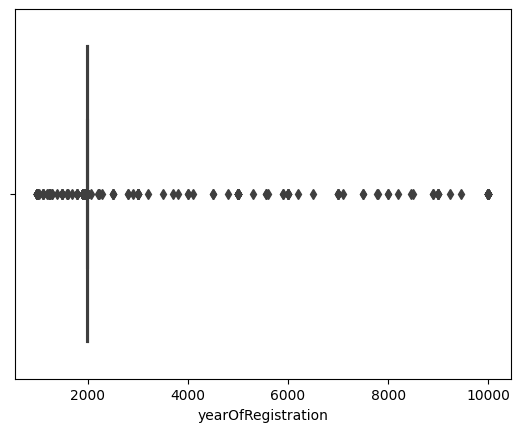

In [45]:
sns.boxplot(x = df['yearOfRegistration'])

In [46]:
q1=df["yearOfRegistration"].quantile(0.25)  
q3=df["yearOfRegistration"].quantile(0.75)
q1

1999.0

In [47]:
q3

2008.0

In [48]:
IQR=q3-q1

In [49]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [50]:
upper_limit

2021.5

In [51]:
lower_limit

1985.5

In [52]:
df["yearOfRegistration"]= np.where(df["yearOfRegistration"]<lower_limit,2003.0,df["yearOfRegistration"])

<AxesSubplot: xlabel='yearOfRegistration'>

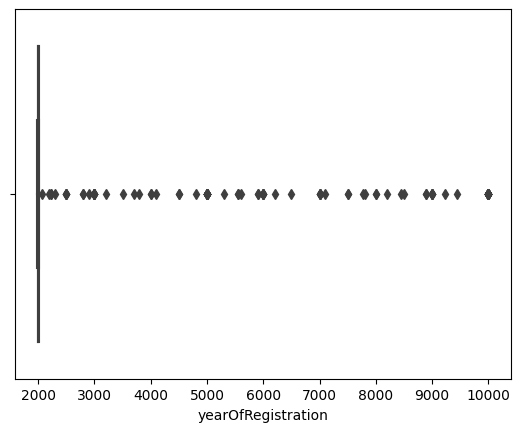

In [53]:
sns.boxplot(x = df['yearOfRegistration'])

In [54]:
df["yearOfRegistration"]= np.where(df["yearOfRegistration"]>upper_limit,2003.0,df["yearOfRegistration"])

<AxesSubplot: xlabel='yearOfRegistration'>

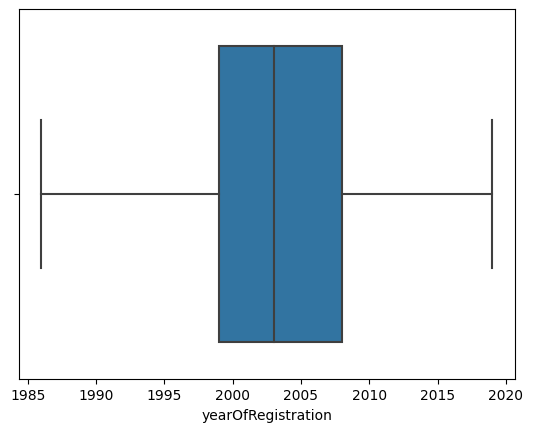

In [55]:
sns.boxplot(x = df['yearOfRegistration'])

<AxesSubplot: >

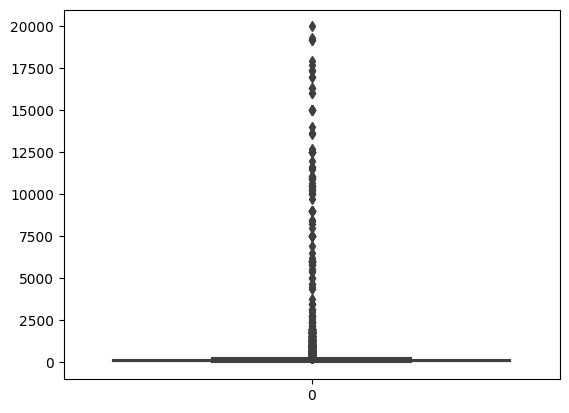

In [56]:
sns.boxplot(df['powerPS'])

In [57]:
q1=df["powerPS"].quantile(0.25)  
q3=df["powerPS"].quantile(0.75)
q1

69.0

In [58]:
q3

150.0

In [59]:
IQR=q3-q1

In [60]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [61]:
upper_limit

271.5

In [62]:
lower_limit

-52.5

In [63]:
df["powerPS"]= np.where(df["powerPS"]>upper_limit,270.0,df["powerPS"])

<AxesSubplot: >

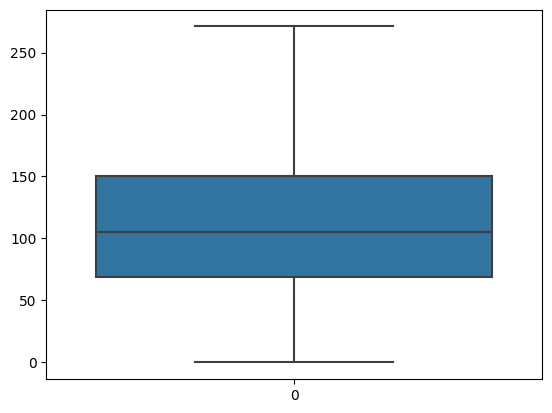

In [64]:
sns.boxplot(df['powerPS'])

<AxesSubplot: >

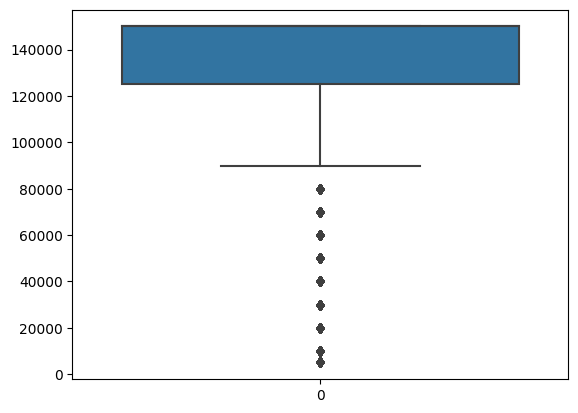

In [65]:
sns.boxplot(df['kilometer'])

In [66]:
q1=df["kilometer"].quantile(0.25)  
q3=df["kilometer"].quantile(0.75)
q1

125000.0

In [67]:
q3

150000.0

In [68]:
IQR=q3-q1

In [69]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [70]:
upper_limit

187500.0

In [71]:
lower_limit

87500.0

In [72]:
df["kilometer"]= np.where(df["kilometer"]<lower_limit,87500.0,df["kilometer"])

<AxesSubplot: >

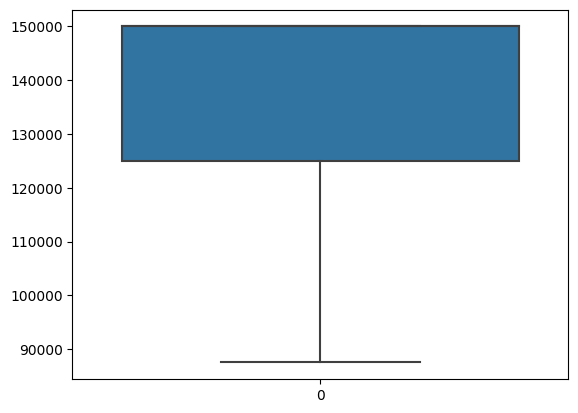

In [73]:
sns.boxplot(df['kilometer'])

In [74]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,16150.0,1,6.0,1993.0,1,0.0,118,150000.0,0,1,38,0,70435
1,16150.0,1,3.0,2011.0,1,190.0,118,125000.0,5,3,1,1,66954
2,16150.0,1,7.0,2004.0,0,163.0,119,125000.0,8,3,14,0,90480
3,16150.0,1,4.0,2001.0,1,75.0,118,150000.0,6,1,38,0,91074
4,16150.0,1,4.0,2008.0,1,69.0,103,90000.0,7,3,31,0,60437


# Split the Data into Dependent and Independent variables.

In [75]:
x=df.drop(columns=['price'],axis=1)
x

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,1,6.0,1993.0,1,0.0,118,150000.0,0,1,38,0,70435
1,1,3.0,2011.0,1,190.0,118,125000.0,5,3,1,1,66954
2,1,7.0,2004.0,0,163.0,119,125000.0,8,3,14,0,90480
3,1,4.0,2001.0,1,75.0,118,150000.0,6,1,38,0,91074
4,1,4.0,2008.0,1,69.0,103,90000.0,7,3,31,0,60437
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,1,6.0,2005.0,1,0.0,118,87500.0,1,1,33,0,39576
371524,1,2.0,2000.0,0,101.0,108,125000.0,3,1,32,0,26135
371525,1,1.0,1996.0,1,102.0,225,150000.0,3,3,38,0,87439
371526,1,5.0,2002.0,1,100.0,118,150000.0,6,3,38,0,40764


In [76]:
y = df['price']
y

0         16150.0
1         16150.0
2         16150.0
3         16150.0
4         16150.0
           ...   
371523    16150.0
371524    16150.0
371525    16150.0
371526    16150.0
371527    16150.0
Name: price, Length: 355235, dtype: float64